The dataset I used was Human Activity Recognition with Smartphones [1], downloaded from Kaggle [2]. This version has the mentioned 561 feature vector that I will be using. With this dataset, I'm interested in classifying the activity from the movement data. 

Using the paper by Anguita et al., I attempted to roughly reproduce the authors' results. They used a multiclass support vector classifier (SVC), which is often effective in heterogenous recognition tasks. 

I did not implement fix-point calculations, though I'm interested in reproducing this in the future as well. 

Compared to the default settings of a SVC classifier with a RBF kernel, following the paper's instructions yielded a higher accuracy (default: 93.3% vs reproduced paper: 96.4%)

[1] Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. A Public Domain Dataset for Human Activity Recognition Using Smartphones. 21th European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning, ESANN 2013. Bruges, Belgium 24-26 April 2013.  
[2] https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

In [2]:
import pandas as pd
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import mean_squared_error, confusion_matrix

In [3]:
# read in data
tr = pd.read_csv('human-activity-recognition-with-smartphones/train.csv')
te = pd.read_csv('human-activity-recognition-with-smartphones/test.csv')

# Data Exploration

In [4]:
# check that shape matches documentation
print(tr.shape)
print(te.shape)

(7352, 563)
(2947, 563)


In [5]:
tr.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
# check for any null values
tr.isnull().values.any()
te.isnull().values.any()

False

In [7]:
# there are six activities to be classified into: 
# (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING)

# encode into numerical category codes for training labels
tr_y=tr['Activity'].astype('category').cat.codes
te_y=te['Activity'].astype('category').cat.codes

In [8]:
# drop activity and use the rest as training features
# subject number left in as feature. 
# maybe could later see if we could predict the subject based on movement?
tr_x = tr.drop('Activity', axis=1)
te_x = te.drop('Activity', axis=1)

In [9]:
np.unique(tr['subject'])
# the subjects recorded in the data
# some are missing

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30])

<IPython.core.display.Javascript object>


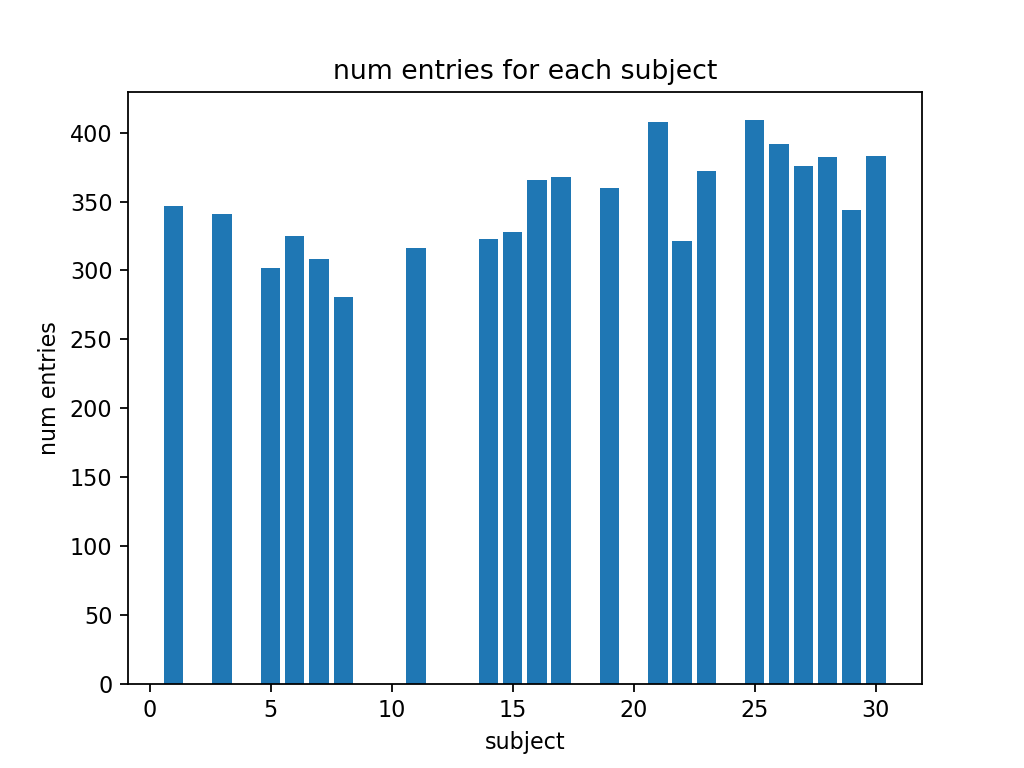

In [128]:
# check how many entries there are for each subject
# it's very uneven
num_entries = list()
for i in range(30):
    num_entries.append(len(tr[tr['subject']==i+1]))

plt.bar(np.arange(1,31), num_entries)
plt.title('num entries for each subject')
plt.xlabel('subject')
plt.ylabel('num entries')
plt.show()

In [116]:
# average number of entries per subject
np.mean(num_entries)

245.06666666666666

# Classification with sklearn's SVM

In [17]:
# accuracy: check how many predictions are same as actual
get_accuracy = lambda y_pr,y: ((y==y_pr).sum())/len(y)

In [59]:
from sklearn.svm import SVC

clf = SVC() # default rbf kernel
tr_svc=clf.fit(tr_x,tr_y)
y_pred=tr_svc.predict(te_x)

get_accuracy(y_pred,te_y)

0.9307770614183916

In [60]:
# just out of curiousity, I used a linear kernel with default settings
# it performed quite well, at 96% accuracy 
clf = SVC(kernel='linear')
tr_svc=clf.fit(tr_x,tr_y)
y_pred=tr_svc.predict(te_x)

get_accuracy(y_pred,te_y)

0.9633525619273838

In [86]:
from sklearn.grid_search import GridSearchCV
# similar to paper:
# grid search was used to find C and gamma
# use cross validation cv = 10
# sklearn's multiclass support is based on one-vs-one scheme

param_grid = [
    {'C':[1, 10, 100, 1000], 'gamma': [0.001,0.0001]},
    # add this in, bc by itself linear kernel performs quite well
    {'C':[1, 10, 100, 1000], 'gamma': [0.001,0.0001], 'kernel':['linear']} 
]

clf_paper = SVC() # default rbf kernel
clf = GridSearchCV(clf_paper, param_grid, cv=10, refit=True)

In [87]:
tr_svc=clf.fit(tr_x,tr_y)

In [88]:
dec_fun = tr_svc.decision_function(te_x) # use best parameters

In [89]:
# show what decision function looks like
pd.DataFrame(dec_fun).head(5)

,0,1,2,3,4,5
0,2.974712,4.031675,5.252480,-0.094534,0.912086,1.923582
1,2.981292,4.136636,5.228767,1.952038,-0.184069,0.885335
2,2.973514,4.170458,5.224034,1.977437,0.843810,-0.189253
3,2.966836,4.163373,5.242464,1.966824,-0.177898,0.838401
4,2.962488,4.155063,5.265346,1.952339,-0.166271,0.831037


In [90]:
y_pred = list()
for i in range(len(dec_fun)):
    # get index of element with the highest probability
    # this is the predicted class
    y_pred.append(np.argmax(dec_fun[i,:]))
    
get_accuracy(y_pred,te_y) 

0.9643705463182898

In [21]:
from sklearn.metrics import precision_recall_fscore_support

In [91]:
# recall: num relevant identified / total relevant 

average_precision = precision_recall_fscore_support(te_y,y_pred,average='weighted') 
print('precision: ', average_precision[0])
print('recall: ', average_precision[1])

precision:  0.9653864312768177
recall:  0.9643705463182898


In [92]:
# create a confusion matrix 
cm = confusion_matrix(te_y, y_pred) 

In [93]:
print(cm)
# the diagonal entries show the number of correctly classified for each activity

[[537   0   0   0   0   0]
 [  0 435  55   0   0   1]
 [  0  16 516   0   0   0]
 [  0   0   0 494   1   1]
 [  0   0   0   4 410   6]
 [  0   0   0  19   2 450]]


In [10]:
# taken from sklearn's example code:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

<IPython.core.display.Javascript object>


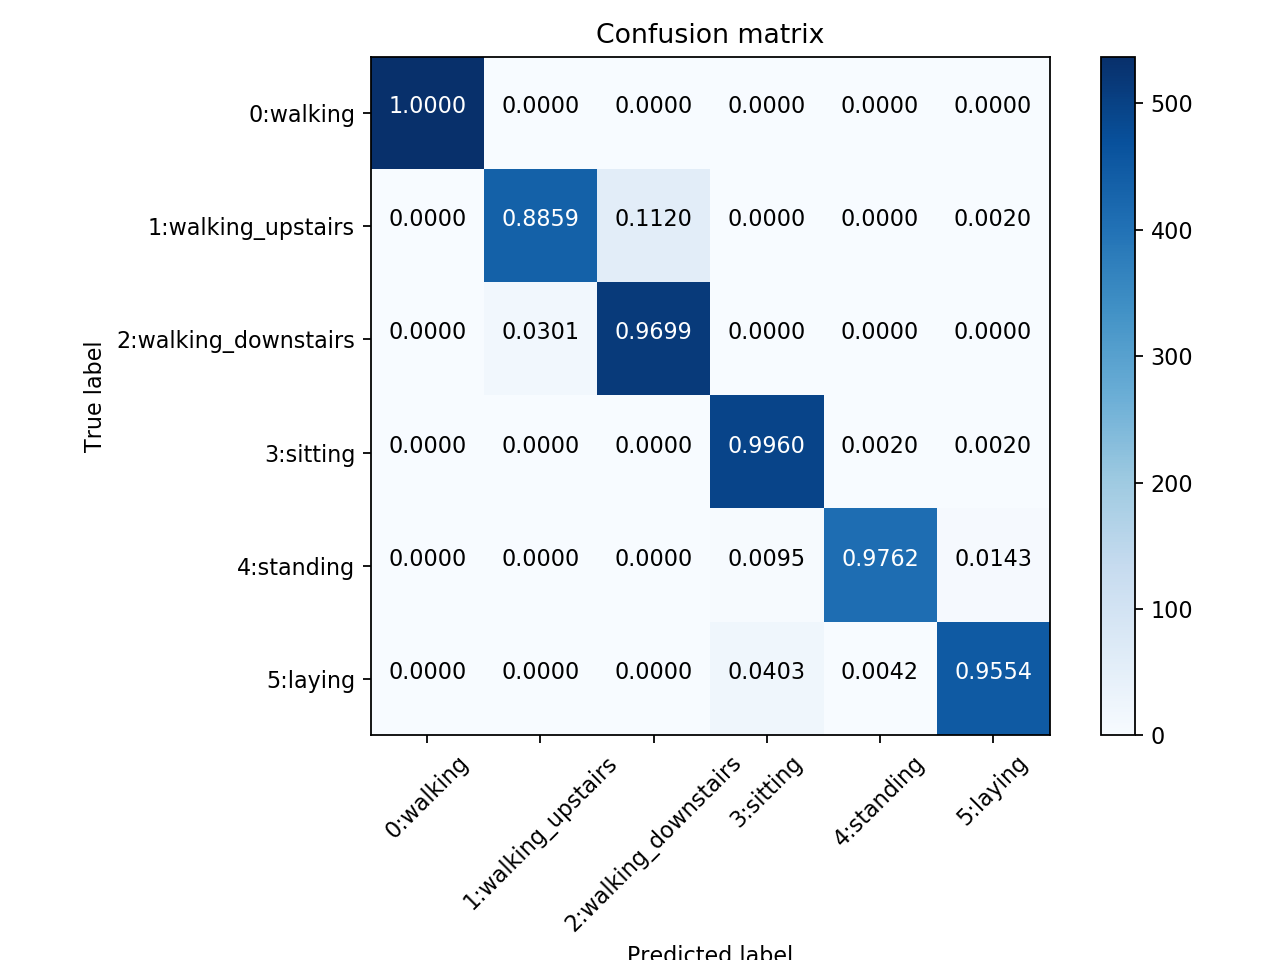

In [95]:
target_names = ['0:walking',
               '1:walking_upstairs',
               '2:walking_downstairs',
               '3:sitting',
               '4:standing',
               '5:laying']

# create confusion matrix for SVM model results
plot_confusion_matrix(cm, target_names)

# RNN with Keras

In [11]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import np_utils
from keras import initializers

# make a copy to keep categorical codes
# after one hot encoding
te_y_original = te_y.copy()

# one hot encoding turns categorical codes to binary arrays of len (6,)
# for output layer dense6
tr_y=pd.get_dummies(tr['Activity']) 
te_y=pd.get_dummies(te['Activity']) 

tr_x=np.array(tr_x)
te_x=np.array(te_x)

n,d = tr_x.shape

tr_y=np.array(tr_y)
te_y=np.array(te_y)

n_steps = 2
n_features = 281

# samples, time steps, features
tr_x=np.reshape(tr_x,[len(tr_x),n_steps,n_features])
te_x=np.reshape(te_x,[len(te_x),n_steps,n_features])

/Users/ilsetse/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
n_hidden = 64 # hidden layer num of features
n_classes = 6 # 6 activities

input_shape = (n_steps, n_features)

In [13]:
# LSTM network
model = Sequential()
model.add(LSTM(n_hidden,return_sequences=True,input_shape=input_shape))
model.add(LSTM(n_hidden, return_sequences=True))
model.add(LSTM(n_hidden, return_sequences=True))
model.add(LSTM(n_hidden))
model.add(Dense(n_classes, activation='relu'))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2, 64)             88576     
_________________________________________________________________
lstm_2 (LSTM)                (None, 2, 64)             33024     
_________________________________________________________________
lstm_3 (LSTM)                (None, 2, 64)             33024     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 188,038
Trainable params: 188,038
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(tr_x,tr_y,validation_data=(te_x,te_y),epochs=50,batch_size=200)
scores = model.evaluate(te_x, te_y, verbose=0)

Train on 7352 samples, validate on 2947 samples
Epoch 1/50
7352/7352 [==============================] - 4s 535us/step - loss: 0.1373 - acc: 0.2742 - val_loss: 0.1140 - val_acc: 0.3420
Epoch 2/50
7352/7352 [==============================] - 1s 177us/step - loss: 0.1016 - acc: 0.4689 - val_loss: 0.0801 - val_acc: 0.6844
Epoch 3/50
7352/7352 [==============================] - 1s 198us/step - loss: 0.0608 - acc: 0.7843 - val_loss: 0.0408 - val_acc: 0.8473
Epoch 4/50
7352/7352 [==============================] - 2s 205us/step - loss: 0.0191 - acc: 0.9310 - val_loss: 0.0248 - val_acc: 0.9002
Epoch 5/50
7352/7352 [==============================] - 1s 200us/step - loss: 0.0099 - acc: 0.9687 - val_loss: 0.0183 - val_acc: 0.9301
Epoch 6/50
7352/7352 [==============================] - 1s 157us/step - loss: 0.0080 - acc: 0.9733 - val_loss: 0.0175 - val_acc: 0.9315
Epoch 7/50
7352/7352 [==============================] - 1s 158us/step - loss: 0.0080 - acc: 0.9713 - val_loss: 0.0191 - val_acc: 0.9253


In [15]:
print("Accuracy: %.3f%%" % (scores[1]*100))

Accuracy: 93.790%


In [18]:
# sanity check that my lambda function was correct
y_pred = model.predict_classes(te_x)
get_accuracy(y_pred,te_y_original) 

0.9379029521547336

<IPython.core.display.Javascript object>


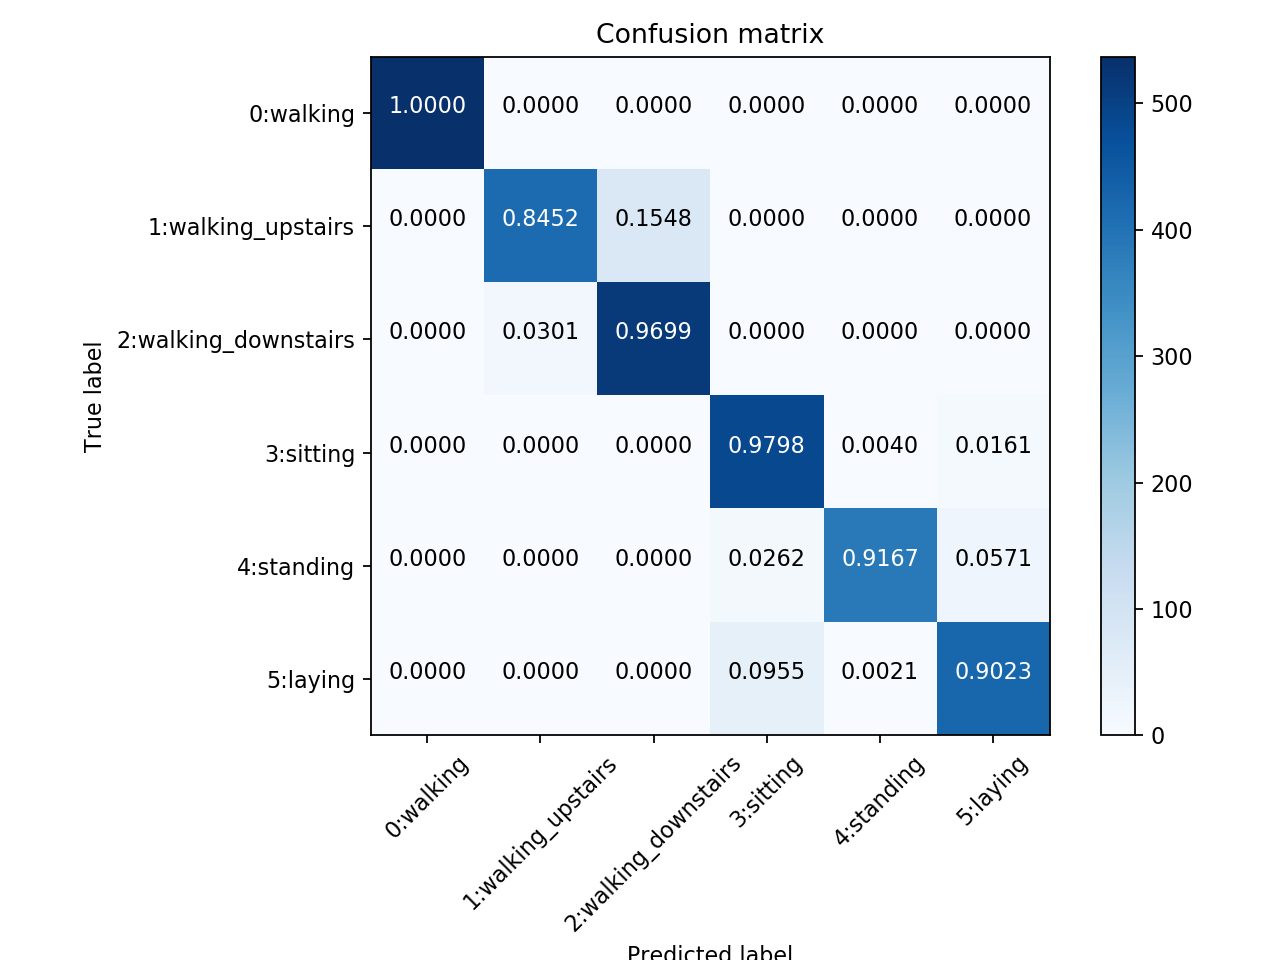

In [19]:
target_names = ['0:walking',
               '1:walking_upstairs',
               '2:walking_downstairs',
               '3:sitting',
               '4:standing',
               '5:laying']

# create confusion matrix for RNN model results
cm = confusion_matrix(te_y_original, y_pred) 
plot_confusion_matrix(cm, target_names)

In [22]:
average_precision = precision_recall_fscore_support(te_y_original,y_pred,average='weighted') 
print('precision: ', average_precision[0])
print('recall: ', average_precision[1])

precision:  0.9409570285083058
recall:  0.9379029521547336



# Future work
If I continued this project, I would go about answering another question: Could we accurately identify which subject performed the movement?